<ipython-input-2-f325558f5be4>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(0, inplace=True)


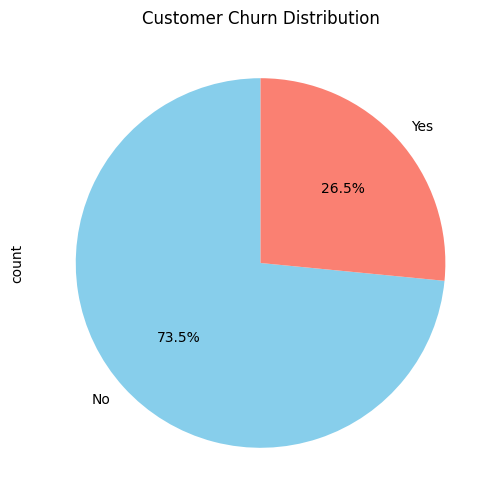

<ipython-input-2-f325558f5be4>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='InternetService', data=data, palette='pastel')


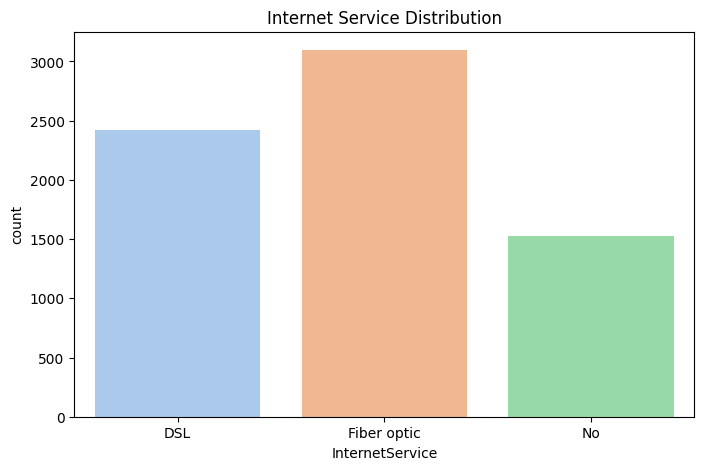

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


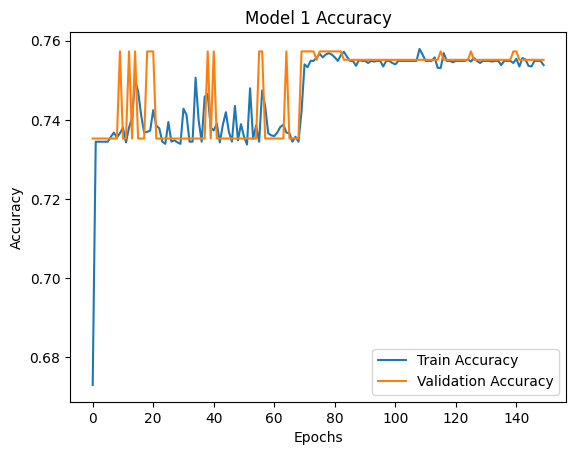

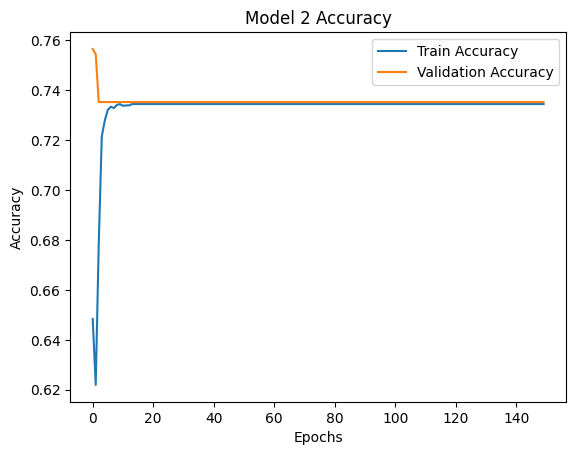

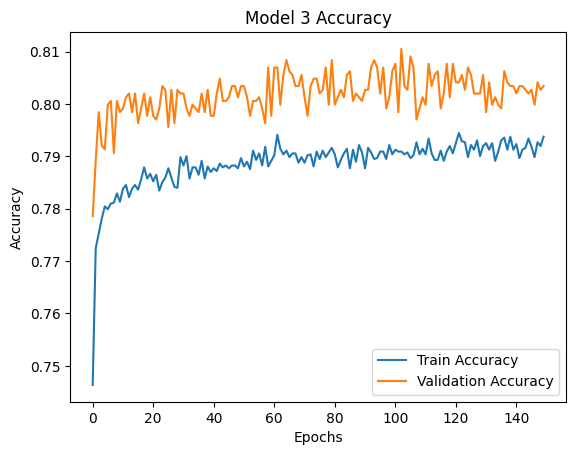

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score

# Load data
data = pd.read_csv("/content/customer_churn (2).csv")

# Handle missing or non-numeric values in TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(0, inplace=True)

# Data Manipulation
a = data[data['gender'] == 'Male'].shape[0]
b = data[data['InternetService'] == 'DSL'].shape[0]
new_customer1 = data[(data['gender'] == 'Female') & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == 'Mailed check')]
new_customer2 = data[(data['tenure'] < 10) | (data['TotalCharges'] < 500)]

# Data Visualization
plt.figure(figsize=(6,6))
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Customer Churn Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', data=data, palette='pastel')
plt.title('Internet Service Distribution')
plt.show()

# Model Building - Preprocessing
data['Churn'] = LabelEncoder().fit_transform(data['Churn'])
X = data[['tenure']]
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1
model1 = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=0)
preds1 = (model1.predict(X_test) > 0.5).astype(int)
cm1 = confusion_matrix(y_test, preds1)

# Model 2 (With Dropout)
model2 = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=0)
preds2 = (model2.predict(X_test) > 0.5).astype(int)
cm2 = confusion_matrix(y_test, preds2)

# Model 3 (Multiple Features)
X = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model3 = Sequential([
    Dense(12, activation='relu', input_shape=(3,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=0)
preds3 = (model3.predict(X_test) > 0.5).astype(int)
cm3 = confusion_matrix(y_test, preds3)

# Accuracy vs Epochs Plot
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history1, 'Model 1 Accuracy')
plot_accuracy(history2, 'Model 2 Accuracy')
plot_accuracy(history3, 'Model 3 Accuracy')

In [ ]:
n